In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
from google.colab import drive
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mat = scipy.io.loadmat('/content/drive/My Drive/train_32x32.mat')
# data = loadmat('train_32x32.mat')
X = mat['X']
y = mat['y']


In [ ]:
X = X.reshape(32,32,3,-1).transpose(3,0,1,2)
num_samples, height, width, channels = X.shape
X = X.reshape(num_samples, -1)
y = y.reshape(num_samples)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (73257, 3072)
y shape: (73257,)


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)


<Axes: ylabel='count'>

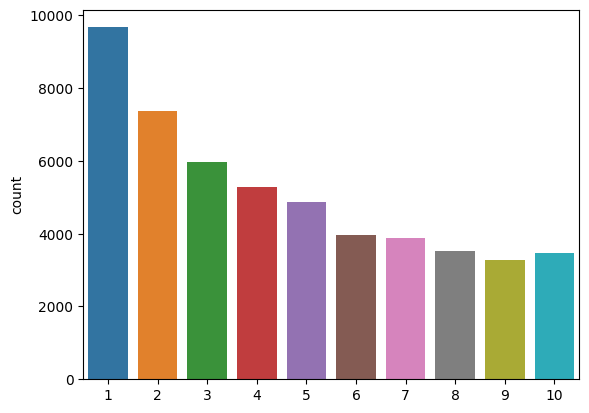

In [ ]:
# train distribution
sns.countplot(x=y_train)



<Axes: ylabel='count'>

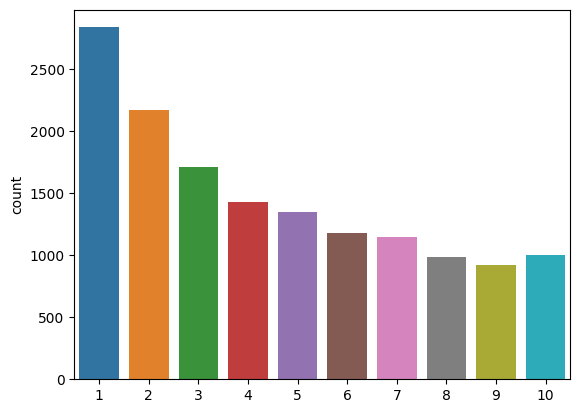

In [ ]:
# validation distribution
sns.countplot(x=y_val)


<Axes: ylabel='count'>

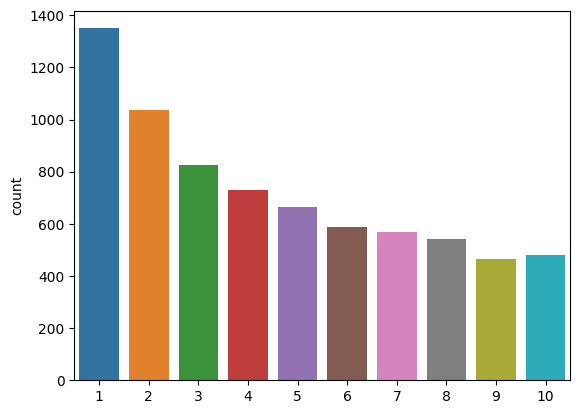

In [ ]:
# test distribution
sns.countplot(x=y_test)

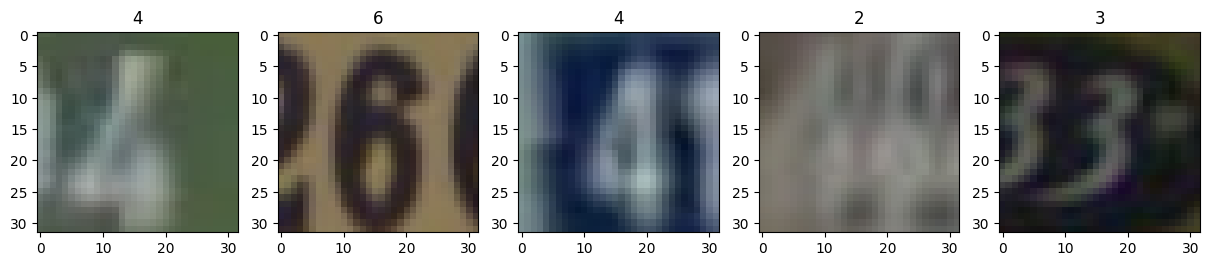

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 10))
axes = axes.ravel()

for i in range(10, 15):
    axes[i-10].imshow(X_train[i].reshape(32,32,3))
    axes[i-10].set_title(y_train[i])


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xs_train = scaler.fit_transform(X_train)

Xs_val = scaler.transform(X_val)
Xs_test= scaler.transform(X_test)


In [ ]:
Xs_train = np.concatenate((Xs_train, Xs_val))
y_train = np.concatenate((y_train, y_val))


In [ ]:
model = MLPClassifier(hidden_layer_sizes=(256, 128), activation='relu', learning_rate_init = 0.0001, batch_size = 64, max_iter=150, shuffle = True, early_stopping = True, verbose = True, validation_fraction = 0.22)
model.fit(Xs_train, y_train)

Iteration 1, loss = 1.42869577
Validation score: 0.682942
Iteration 2, loss = 0.93219594
Validation score: 0.744026
Iteration 3, loss = 0.79738356
Validation score: 0.762964
Iteration 4, loss = 0.70885479
Validation score: 0.790855
Iteration 5, loss = 0.65274153
Validation score: 0.797190
Iteration 6, loss = 0.60434078
Validation score: 0.795537
Iteration 7, loss = 0.56964055
Validation score: 0.813511
Iteration 8, loss = 0.53916917
Validation score: 0.819158
Iteration 9, loss = 0.51216318
Validation score: 0.820123
Iteration 10, loss = 0.48918601
Validation score: 0.817919
Iteration 11, loss = 0.46514299
Validation score: 0.828524
Iteration 12, loss = 0.44805593
Validation score: 0.820054
Iteration 13, loss = 0.43643586
Validation score: 0.805179
Iteration 14, loss = 0.41840089
Validation score: 0.828455
Iteration 15, loss = 0.40157806
Validation score: 0.833414
Iteration 16, loss = 0.38892236
Validation score: 0.817368
Iteration 17, loss = 0.37698006
Validation score: 0.829144
Iterat

MLPClassifier(batch_size=64, early_stopping=True, hidden_layer_sizes=(256, 128),
              learning_rate_init=0.0001, max_iter=150, validation_fraction=0.22,
              verbose=True)

In [ ]:
y_pred = model.predict(Xs_test)

In [ ]:
print(accuracy_score(y_pred, y_test))

0.8311043706052668


In [ ]:
labels = []
label_dict = {}
for i in range(1, 11):
  label_dict[i] = []

for i in range(len(y_test)):
  if y_test[i] != y_pred[i]:
      labels.append(i)
      label_dict[y_test[i]].append(i)

print(len(labels), len(y_test))

1679 7253


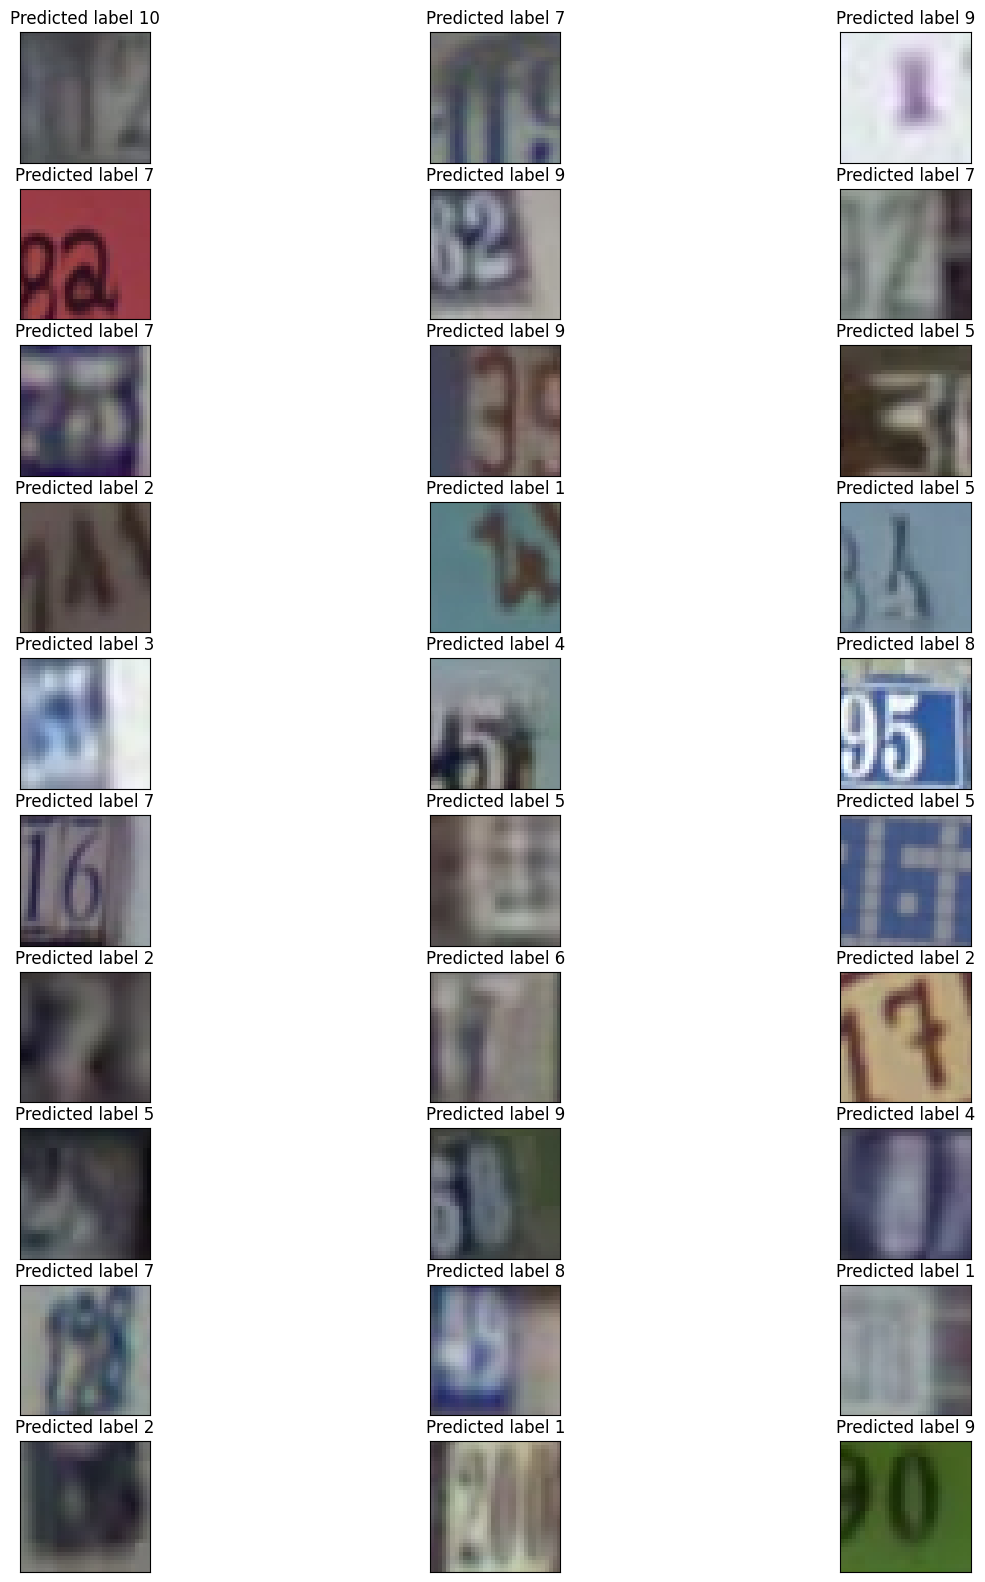

In [ ]:
fig, axes = plt.subplots(10, 3, figsize=(15, 20))
axes = axes.ravel()

for i in range(1,11):
    count = 0
    while count < 3:
      axes[3*(i-1)+count].imshow(X_test[label_dict[i][count]].reshape(32,32,3))
      axes[3*(i-1)+count].set_title(f'Predicted label {y_pred[label_dict[i][count]]}')
      axes[3 * (i - 1) + count].set_xticks([])
      axes[3 * (i - 1) + count].set_yticks([])

      count += 1

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(128, 64), (256, 128), (512, 256)],
    'solver': ['adam'],
    'batch_size' : [32, 64, 128],
    'learning_rate_init' : [0.1, 0.01, 0.001, 0.0001]
}

model = MLPClassifier(shuffle = True, early_stopping = True, max_iter=300)
grid_search = GridSearchCV(model, param_grid, cv=5, verbose = 5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best training score with grid search is : ", best_accuracy, " and best parameters are ", best_params)

In [ ]:
activation_functions = ['relu', 'tanh', 'logistic', 'identity']
accuracies = []

for activation in activation_functions:
    model = MLPClassifier(hidden_layer_sizes=(256, 128), activation = activation, learning_rate_init = 0.0001, batch_size = 64, max_iter=50, shuffle = True, early_stopping = True, verbose = True, validation_fraction = 0.22)
    model.fit(Xs_train, y_train)
    training_loss = model.loss_curve_
    validation_loss = model.validation_scores_
    accuracies.append(accuracy_score(model.predict(Xs_test), y_test))

    plt.figure()
    plt.plot(training_loss, label='Training Loss')
    plt.plot(validation_loss, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss vs. Epochs ({activation} activation)')
    plt.show()

In [ ]:
print(accuracies)